In [1]:
import cv2
import matplotlib.pyplot as plt
from immas import MammogramImage , preprocessing , segmentation
from immas.io import read_dataset
from immas.basic_functions import show_image_plt

from immas import preprocessing

from skimage.feature import local_binary_pattern
import numpy as np



C:\Users\dono_\Anaconda3\envs\immas\lib\site-packages\immas-1.0-py3.6.egg\immas\segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5,1,'Ground truth')

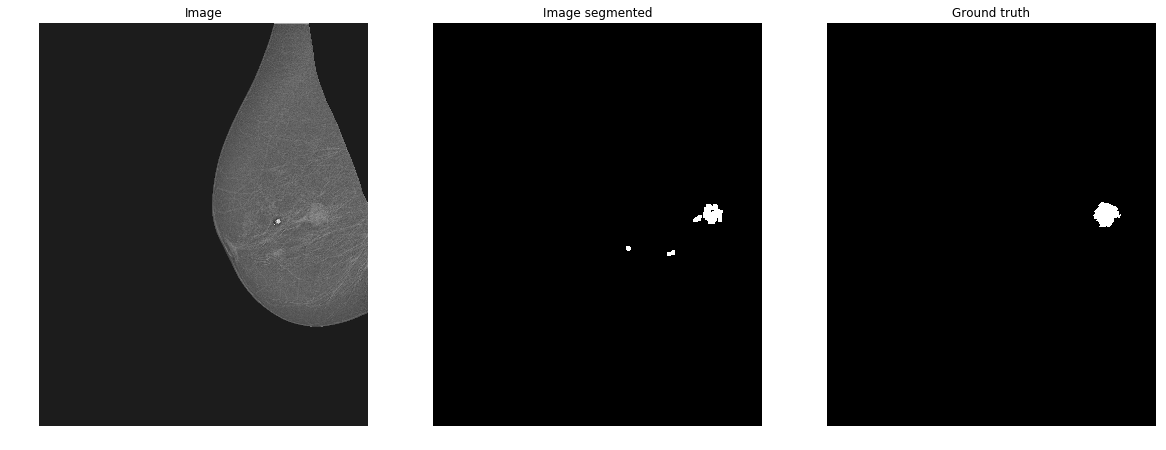

In [2]:

path_image = "../dataset/masses_examples_preprocessed/22670855_0b7396cdccacca82_MG_R_ML_ANON.tif"
path_grnd = "../dataset/groundtruth/22670855_0b7396cdccacca82_MG_R_ML_ANON.tif"
img_prp = cv2.imread(path_image, 0)
img_grnd = cv2.imread(path_grnd, 0)

def Segmentation(img):
    img = segmentation.multithresholding(img)
    img = segmentation.thresh_to_binary(img)
    img2 = preprocessing.open(img,(30,30))
    return (img2)

sgmted = Segmentation(img_prp)

plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(img_prp, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Image')

plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(sgmted, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Image segmented')

plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(img_grnd, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Ground truth')

Text(0.5,1,'Roi example')

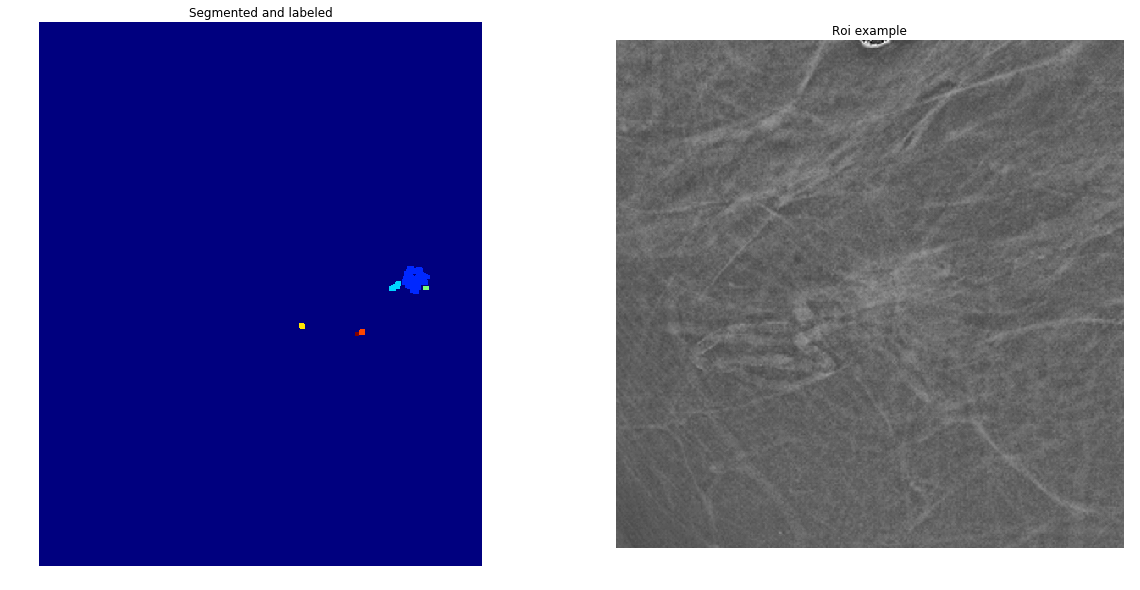

In [3]:
# Generating ROIs
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(sgmted)

roi_size = 300;

for idx in range (0, nlabels):
    if idx == 0:
        continue
    pt1 = (int(centroids[idx][0]-roi_size), int(centroids[idx][1]-roi_size))
    pt2 = (int(centroids[idx][0]+roi_size), int(centroids[idx][1]+roi_size))
    roi = img_prp[pt1[1]:pt2[1], pt1[0]:pt2[0]]
    cv2.imwrite("../dataset/regions_of_interest/22670855_0b7396cdccacca82_MG_R_ML_ANON_roi" + str(idx) + ".tif", roi)
    
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(labels, interpolation="nearest", cmap="jet")
plt.title('Segmented and labeled')

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(roi, interpolation="nearest", cmap="gray")
plt.title('Roi example')


Text(0.5,1,'lbp w/o mass')

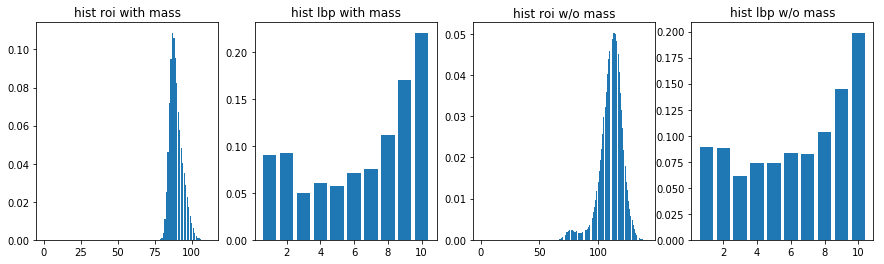

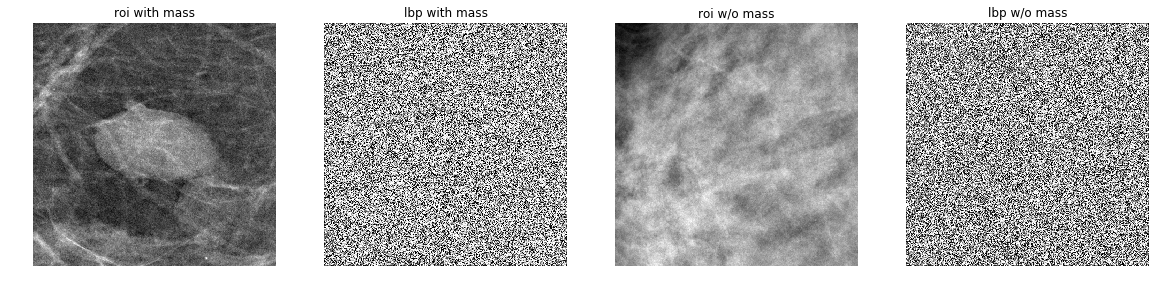

In [13]:
# Local binary patterns
path_mass = "../dataset/regions_of_interest/MASS/training/1_20586960_6c613a14b80a8591_MG_R_ML_ANON.tif"
roi_mass = cv2.imread(path_mass, 0)
path_no_mass = "../dataset/regions_of_interest/NO_MASS/training/20587054_b6a4f750c6df4f90_MG_R_CC_ANON_1816_1816.tif"
roi_no_mass = cv2.imread(path_no_mass, 0)

# Parameters
radius = 1
n_points = 8
METHOD = 'uniform'

lbp_mass = local_binary_pattern(roi_mass, n_points, radius, METHOD)
lbp_no_mass = local_binary_pattern(roi_no_mass, n_points, radius, METHOD)

# compute histogram for rois
n_bins = int(roi_mass.max() + 1)
hist_mass, x_mass = np.histogram(roi_mass, normed=True, bins=n_bins, range=(0, n_bins))

n_bins = int(roi_no_mass.max() + 1)
hist_no_mass, x_no_mass = np.histogram(roi_no_mass, normed=True, bins=n_bins, range=(0, n_bins))

# compute histograms for lbp
n_bins = int(lbp_mass.max() + 1)
hist_lbp_mass, x_lbp_mass = np.histogram(lbp_mass, normed=True, bins=n_bins, range=(0, n_bins))

n_bins = int(lbp_no_mass.max() + 1)
hist_lbp_no_mass, x_lbp_no_mass = np.histogram(lbp_no_mass, normed=True, bins=n_bins, range=(0, n_bins))

plt.figure(figsize=(15, 4)) # plot histograms
plt.subplot(1,4,1)
plt.bar(x_mass[1:], hist_mass)
plt.title('hist roi with mass')

plt.subplot(1,4,2)
plt.bar(x_lbp_mass[1:],hist_lbp_mass)
plt.title('hist lbp with mass')

plt.subplot(1,4,3)
plt.bar(x_no_mass[1:],hist_no_mass)
plt.title('hist roi w/o mass')

plt.subplot(1,4,4)
plt.bar(x_lbp_no_mass[1:],hist_lbp_no_mass)
plt.title('hist lbp w/o mass')


plt.figure(figsize=(20, 10)) #plot images
plt.subplot(1,4,1)
plt.axis("off")
plt.imshow(roi_mass, interpolation="nearest", cmap="gray")
plt.title('roi with mass')

plt.subplot(1,4,2)
plt.axis("off")
plt.imshow(lbp_mass, interpolation="nearest", cmap="gray")
plt.title('lbp with mass')

plt.subplot(1,4,3)
plt.axis("off")
plt.imshow(roi_no_mass, interpolation="nearest", cmap="gray")
plt.title('roi w/o mass')

plt.subplot(1,4,4)
plt.axis("off")
plt.imshow(lbp_no_mass, interpolation="nearest", cmap="gray")
plt.title('lbp w/o mass')

In [17]:
from PIL import Image
import glob

def extractLBP (image):
    lbp = local_binary_pattern(image, n_points, radius, METHOD)
    hist, _ = np.histogram(lbp, normed=True, bins=n_bins, range=(0, n_bins))
    
    return hist

labels = []
data = []

# load training set
for filename in glob.glob('../dataset/regions_of_interest/masses/Training/*.tif'): 
    im = cv2.imread(filename, 0)
    hist = extractLBP(im)
    data.append(hist)
    labels.append('P')
    
for filename in glob.glob('../dataset/regions_of_interest/no_mass/Training/*.tif'): 
    im = cv2.imread(filename, 0)
    hist = extractLBP(im)
    data.append(hist)
    labels.append('N')





Prediction:  ['P']
Prediction:  ['P']
Prediction:  ['P']
Prediction:  ['P']
Prediction:  ['P']
Prediction:  ['P']


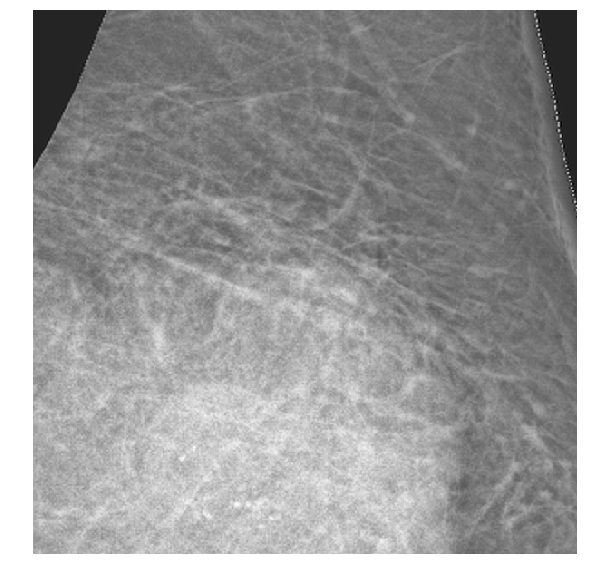

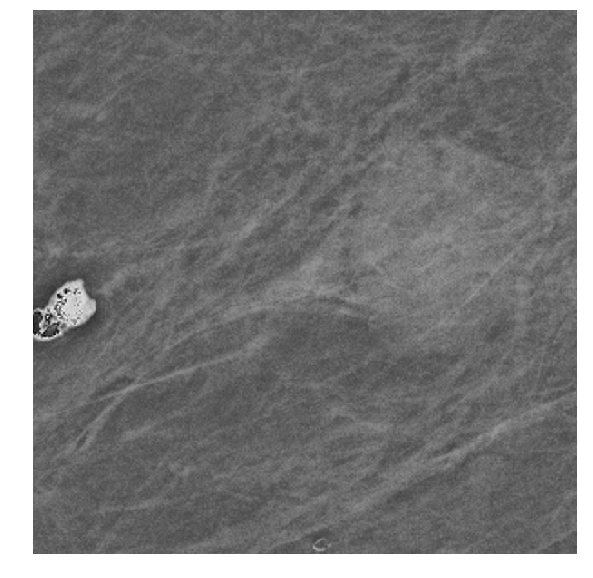

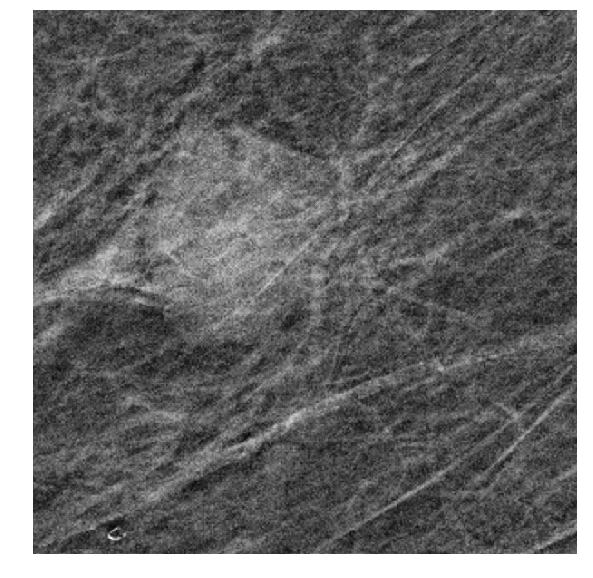

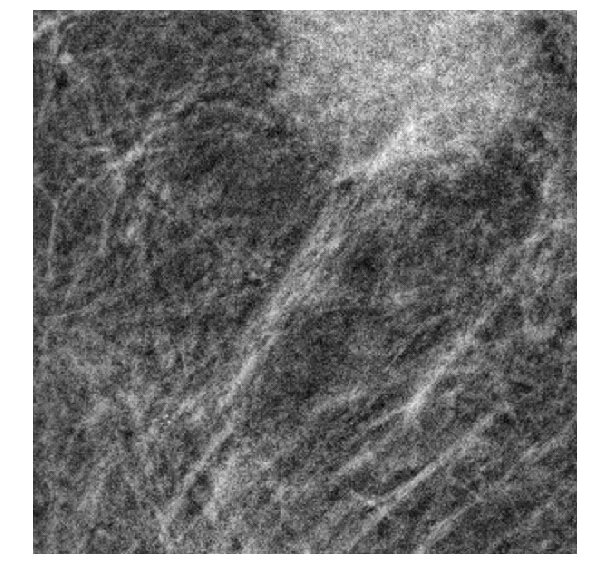

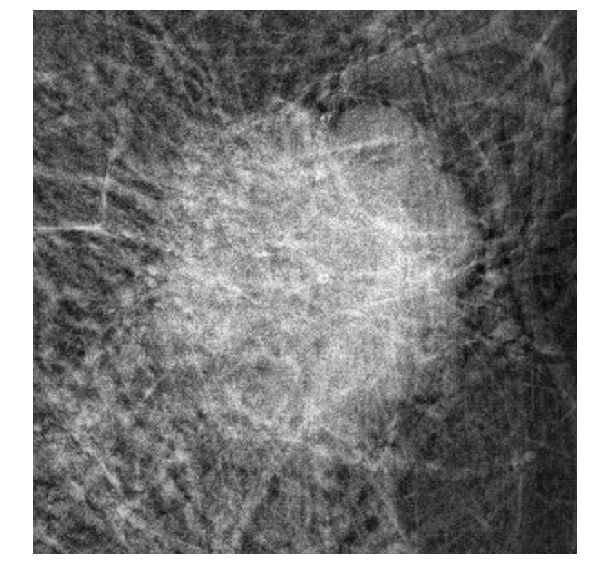

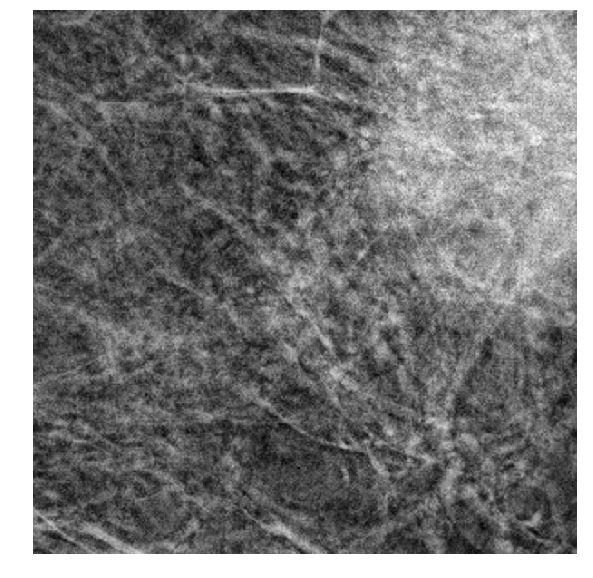

In [18]:
from sklearn.svm import LinearSVC

# create Suport Vector Machine model
model = LinearSVC(C=100.0, random_state=42)
model.fit(data, labels)

# loop over testing images with masses
for filename in glob.glob('../dataset/regions_of_interest/masses/*.tif'): 
    im = cv2.imread(filename, 0)
    hist = extractLBP(im)
    prediction = model.predict(hist.reshape(1,-1))
    print("Prediction: ",prediction)
    plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.imshow(im, interpolation="nearest", cmap="gray")
    


Prediction:  ['P']
Prediction:  ['P']
Prediction:  ['P']
Prediction:  ['P']
Prediction:  ['P']
Prediction:  ['P']


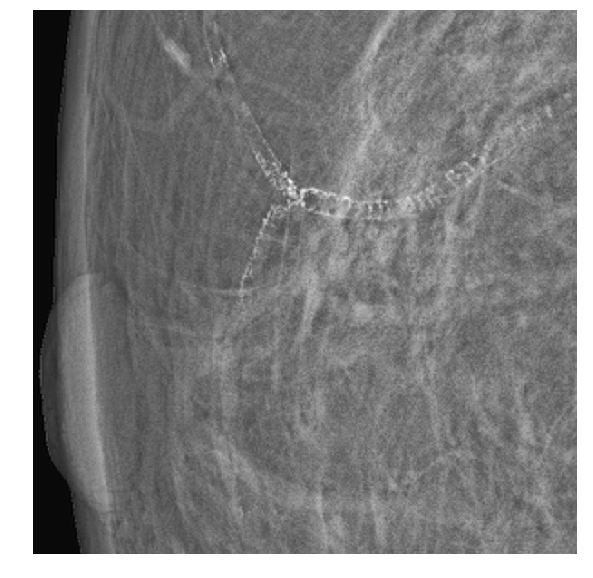

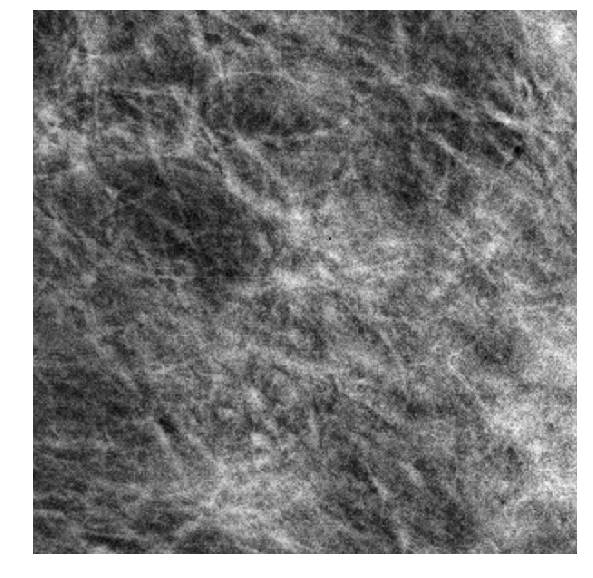

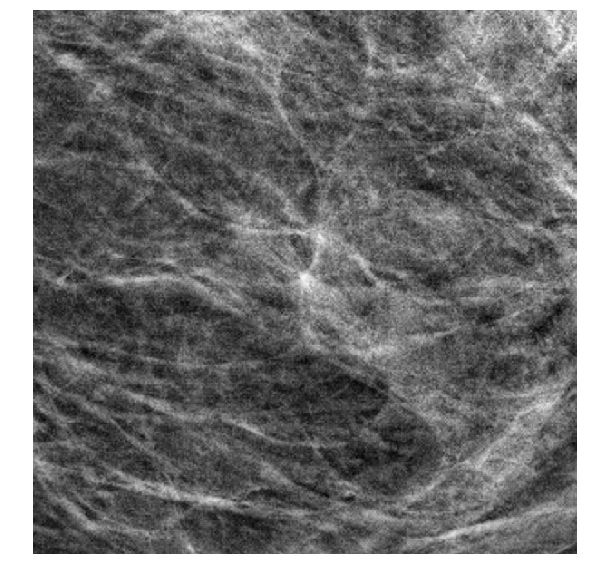

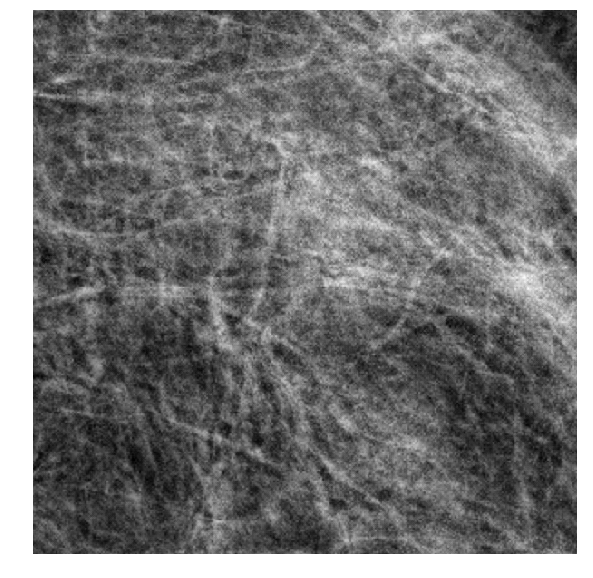

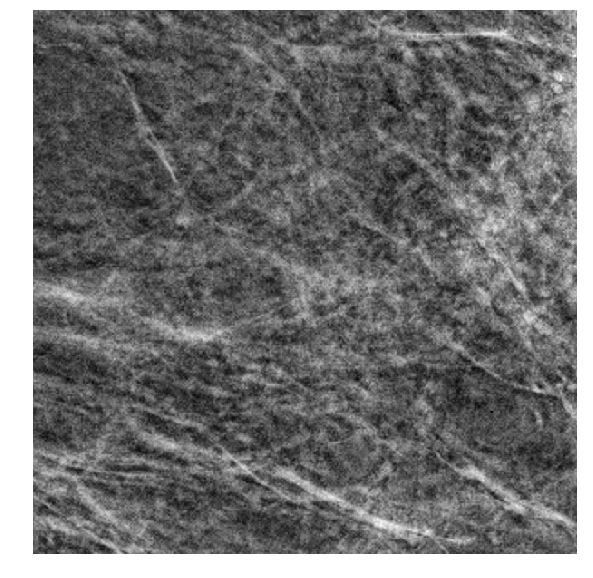

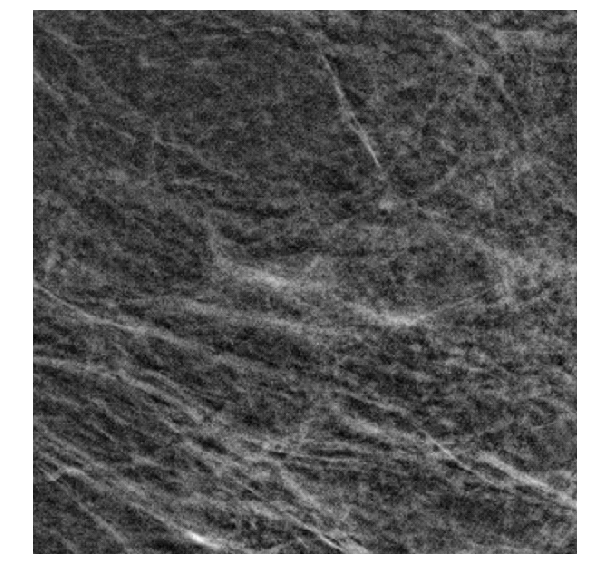

In [19]:
# loop over testing images w/o masses
for filename in glob.glob('../dataset/regions_of_interest/no_mass/*.tif'): 
    im = cv2.imread(filename, 0)
    hist = extractLBP(im)
    prediction = model.predict(hist.reshape(1,-1))
    print("Prediction: ",prediction)
    plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.imshow(im, interpolation="nearest", cmap="gray")
